In [2]:
#读取german数据
#该数据从german_data数据改写，将编码转换为数值
#german.data是经过脱敏的数据，因此从变量中完全看不出变量的意义，仅知道这些变量是连续变量分箱后的顺序值

data<-read.csv("data/GERMAN.csv",fileEncoding="GBK")

data[data$y==1,'y']<-0
data[data$y==2,'y']<-1

head(data)

table(data$y)

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
1,6,4,12,5,5,3,4,1,67,⋯,0,0,1,0,0,1,0,0,1,0
2,48,2,60,1,3,2,2,1,22,⋯,0,0,1,0,0,1,0,0,1,1
4,12,4,21,1,4,3,3,1,49,⋯,0,0,1,0,0,1,0,1,0,0
1,42,2,79,1,4,3,4,2,45,⋯,0,0,0,0,0,0,0,0,1,0
1,24,3,49,1,3,3,4,4,53,⋯,1,0,1,0,0,0,0,0,1,1
4,36,2,91,5,3,3,4,4,35,⋯,0,0,1,0,0,0,0,1,0,0



  0   1 
700 300 

In [28]:
#随机抽样，建立训练集与测试集

set.seed(10)
select<-sample(1:nrow(data),700)
train<-data[select,]
test<-data[-select,]

summary(train)

       x1             x2              x3              x4        
 Min.   :1.00   Min.   : 4.00   Min.   :0.000   Min.   :  2.00  
 1st Qu.:1.00   1st Qu.:12.00   1st Qu.:2.000   1st Qu.: 13.00  
 Median :2.00   Median :18.00   Median :2.000   Median : 23.00  
 Mean   :2.62   Mean   :21.12   Mean   :2.506   Mean   : 33.87  
 3rd Qu.:4.00   3rd Qu.:24.00   3rd Qu.:4.000   3rd Qu.: 42.00  
 Max.   :4.00   Max.   :72.00   Max.   :4.000   Max.   :184.00  
       x5              x6             x7              x8             x9       
 Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:3.00   1st Qu.:2.000   1st Qu.:2.00   1st Qu.:1.000  
 Median :1.000   Median :3.00   Median :3.000   Median :3.00   Median :2.000  
 Mean   :2.154   Mean   :3.37   Mean   :2.647   Mean   :2.84   Mean   :2.367  
 3rd Qu.:3.000   3rd Qu.:4.00   3rd Qu.:3.000   3rd Qu.:4.00   3rd Qu.:3.000  
 Max.   :5.000   Max.   :5.00   Max.   :4.000   Max.   :4.00   Max.   :

In [29]:
#进行中心标准化

train[,1:24]<-scale(train[,1:24])
test[,1:24]<-scale(test[,1:24])
summary(train)

       x1                x2                x3                x4         
 Min.   :-1.2920   Min.   :-1.3736   Min.   :-2.2872   Min.   :-1.0563  
 1st Qu.:-1.2920   1st Qu.:-0.7318   1st Qu.:-0.4616   1st Qu.:-0.6917  
 Median :-0.4945   Median :-0.2504   Median :-0.4616   Median :-0.3602  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 1.1006   3rd Qu.: 0.2309   3rd Qu.: 1.3639   3rd Qu.: 0.2695  
 Max.   : 1.1006   Max.   : 4.0817   Max.   : 1.3639   Max.   : 4.9762  
       x5                x6                x7                x8         
 Min.   :-0.7194   Min.   :-1.9627   Min.   :-2.2583   Min.   :-1.6665  
 1st Qu.:-0.7194   1st Qu.:-0.3064   1st Qu.:-0.8873   1st Qu.:-0.7608  
 Median :-0.7194   Median :-0.3064   Median : 0.4838   Median : 0.1449  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.5271   3rd Qu.: 0.5217   3rd Qu.: 0.4838   3rd Qu.: 1.0506  
 Max.   : 1.7737   Max.   : 1.3499   Max.   : 1.854

#  使用nnet包实现BP神经网络

In [30]:
library(nnet)

In [31]:
model_nnet<- nnet(y~.,linout = F,size=8,decay = 0.01,maxit=300,data=train)

model_nnet

# weights:  209
initial  value 163.733057 
iter  10 value 87.797205
iter  20 value 68.947297
iter  30 value 56.564183
iter  40 value 52.328935
iter  50 value 47.793468
iter  60 value 44.189557
iter  70 value 42.329702
iter  80 value 40.762512
iter  90 value 38.117140
iter 100 value 36.671243
iter 110 value 35.900490
iter 120 value 35.153805
iter 130 value 34.122183
iter 140 value 33.388102
iter 150 value 32.932921
iter 160 value 32.070724
iter 170 value 31.915585
iter 180 value 31.864731
iter 190 value 31.851338
iter 200 value 31.847172
iter 210 value 31.834751
iter 220 value 31.819066
iter 230 value 31.815649
iter 240 value 31.813239
iter 250 value 31.811120
iter 260 value 31.809554
iter 270 value 31.808193
iter 280 value 31.807873
iter 290 value 31.804031
iter 300 value 31.794085
final  value 31.794085 
stopped after 300 iterations


a 24-8-1 network with 209 weights
inputs: x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12 x13 x14 x15 x16 x17 x18 x19 x20 x21 x22 x23 x24 
output(s): y 
options were - decay=0.01

In [32]:
#对分类数据预测需要加上y参数
pre.forest<-predict(model_nnet,test)
out<-pre.forest
out[out<0.5]<-0
out[out>=0.5]<-1

head(out)


2,1
3,0
11,1
12,1
13,0
16,1


In [33]:
#计算准确率

rate2<-sum(out==test$y)/length(test$y)

rate2

[1] 0.66

In [34]:
#做出概率预测
train$lg_nnet_p<-predict(model_nnet, train) 
test$lg_nnet_p<-predict(model_nnet, test) 



In [35]:
#绘制ROC曲线
library(ROCR)

pred_nnet_Tr<- prediction(train$lg_nnet_p,train$y)
perf_nnet_Tr<- performance(pred_nnet_Tr,"tpr","fpr")

pred_nnet_Te<- prediction(test$lg_nnet_p,test$y)
perf_nnet_Te<- performance(pred_nnet_Te,"tpr","fpr")


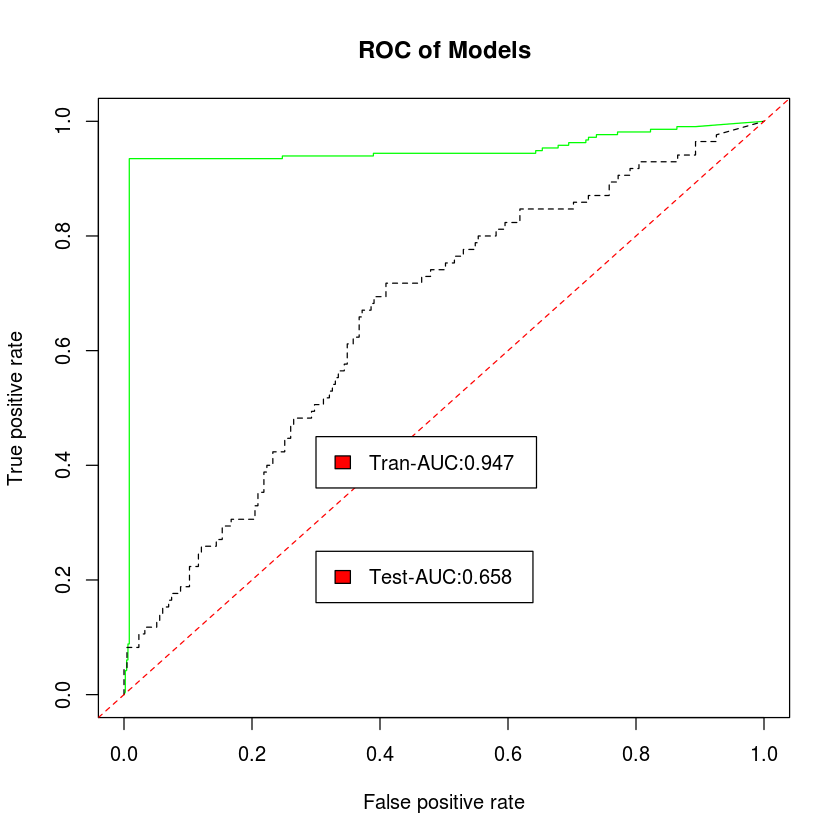

In [40]:
plot(perf_nnet_Tr,col='green',main="ROC of Models")
plot(perf_nnet_Te, col='black',lty=2,add=TRUE);
abline(0,1,lty=2,col='red')

lr_m_auc<-round(as.numeric(performance(pred_nnet_Tr,'auc')@y.values),3)
lr_m_str<-paste("Tran-AUC:",lr_m_auc,sep="")
legend(0.3,0.45,c(lr_m_str),2:8)

lr_m_auc<-round(as.numeric(performance(pred_nnet_Te,'auc')@y.values),3)
lr_m_ste<-paste("Test-AUC:",lr_m_auc,sep="")
legend(0.3,0.25,c(lr_m_ste),2:8)

In [6]:
#查看模型中两个重要参数的情况:只是为了得到取得优良效果的最小值
#要求输入的为数据框，全都为数字，不需要进行标准化
#最大迭代次数maxNum,公式formula,隐藏层大小sizeNum,输入的为数据框DataSet,训练集比例samplerate，神经网络类型ntype,
#1、对隐藏结点（size）的观察

Network<-function(maxNum,formula,sizeNum,DataSet,samplerate){
  library(nnet)
  library(ROCR)
  set.seed(10)
  select<-sample(1:nrow(data),ceiling(nrow(data)*samplerate))
  train=DataSet[select,]
  test=DataSet[-select,]
  #进行中心标准化
  train[,1:24]=scale(train[,1:24])
  test[,1:24]=scale(test[,1:24])
  
  print(table(train$y))   
    
  ROC<-data.frame()
  for (i in seq(from =1,to =sizeNum+1,by =2)){
    model_nnet<-nnet(formula, linout = F,size = i, decay = 0.01, maxit = maxNum,trace = F,data = train) 
    train$lg_nnet_p<-predict(model_nnet, train) 
    test$lg_nnet_p<-predict(model_nnet, test) 
    pred_nnet_Tr <- prediction(train$lg_nnet_p, train$y)
    perf_nnet_Tr <- performance(pred_nnet_Tr,"tpr","fpr")
    pred_nnet_Te <- prediction(test$lg_nnet_p, test$y)
    perf_nnet_Te <- performance(pred_nnet_Te,"tpr","fpr")
    lr_m_auc_Tr<-round(as.numeric(performance(pred_nnet_Tr,'auc')@y.values),3)
    lr_m_auc_Te<-round(as.numeric(performance(pred_nnet_Te,'auc')@y.values),3)
    out<-data.frame(i,lr_m_auc_Tr,lr_m_auc_Te)
    ROC<-rbind(ROC,out)
  }  
  return(ROC)
}

In [7]:
Roc<-Network(maxNum=100,formula=y~.,sizeNum=20,DataSet=data,samplerate=0.7)
names(Roc)<-c("size","Index_Train","Index_Test")

Roc


  0   1 
485 215 


size,Index_Train,Index_Test
1,0.820,0.741
3,0.881,0.685
5,0.964,0.630
7,0.986,0.623
9,1.000,0.676
11,1.000,0.716
13,1.000,0.719
15,1.000,0.717
17,1.000,0.718
19,1.000,0.715


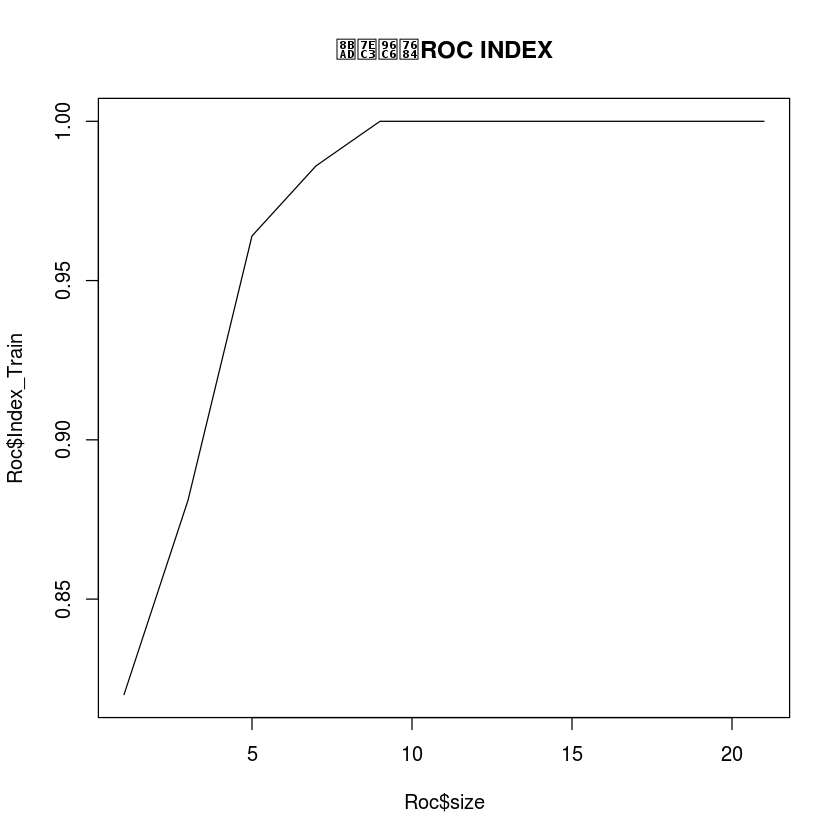

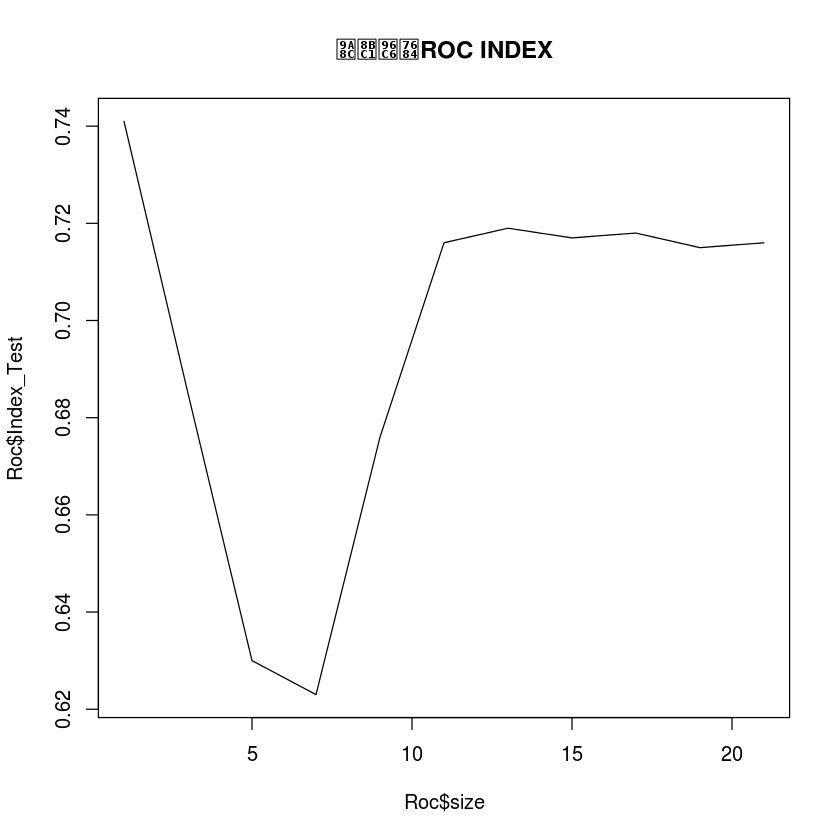

In [49]:
plot(Roc$size,Roc$Index_Train,type="l",main="训练集的ROC INDEX")
plot(Roc$size,Roc$Index_Test,type="l",main="验证集的ROC INDEX")

In [50]:
#2、对迭代次数（maxit）的观察
Network2<-function(maxNum,formula,sizeNum,DataSet,samplerate){
  library(nnet)
  library(ROCR)
  set.seed(10)
  select<-sample(1:nrow(data),ceiling(nrow(data)*samplerate))
  train=DataSet[select,]
  test=DataSet[-select,]
  #进行中心标准化
  train[,1:24]=scale(train[,1:24])
  test[,1:24]=scale(test[,1:24])
  
  model_nnet<-nnet(formula, linout = F,size = sizeNum, decay = 0.01, maxit = maxNum,trace = F,data = train) 
  train$lg_nnet_p<-predict(model_nnet, train) 
  test$lg_nnet_p<-predict(model_nnet, test) 
  pred_nnet_Tr <- prediction(train$lg_nnet_p, train$y)
  perf_nnet_Tr <- performance(pred_nnet_Tr,"tpr","fpr")
  
  pred_nnet_Te <- prediction(test$lg_nnet_p, test$y)
  perf_nnet_Te <- performance(pred_nnet_Te,"tpr","fpr")
  lr_m_auc_Tr<-round(as.numeric(performance(pred_nnet_Tr,'auc')@y.values),3)
  lr_m_auc_Te<-round(as.numeric(performance(pred_nnet_Te,'auc')@y.values),3)
  #print("ROC Index of Train:",lr_m_auc_Tr)
  #print("ROC Index of Test:",lr_m_auc_Te)
  ROC<-data.frame()
  for (i in seq(from =1,to =maxNum,by =2)){
    model_nnet<-nnet(formula, linout = F,size = sizeNum, decay = 0.01, maxit = i,trace = F,data = train) 
    train$lg_nnet_p<-predict(model_nnet, train) 
    test$lg_nnet_p<-predict(model_nnet, test) 
    pred_nnet_Tr <- prediction(train$lg_nnet_p, train$y)
    perf_nnet_Tr <- performance(pred_nnet_Tr,"tpr","fpr")
    pred_nnet_Te <- prediction(test$lg_nnet_p, test$y)
    perf_nnet_Te <- performance(pred_nnet_Te,"tpr","fpr")
    lr_m_auc_Tr<-round(as.numeric(performance(pred_nnet_Tr,'auc')@y.values),3)
    lr_m_auc_Te<-round(as.numeric(performance(pred_nnet_Te,'auc')@y.values),3)
    out<-data.frame(i,lr_m_auc_Tr,lr_m_auc_Te)
    ROC<-rbind(ROC,out)
  }  
  return(ROC)
}

In [51]:
Roc<-Network2(maxNum=150,formula=y~.,sizeNum=5,DataSet=data,samplerate=0.7)
names(Roc)<-c("maxit","Index_Train","Index_Test")

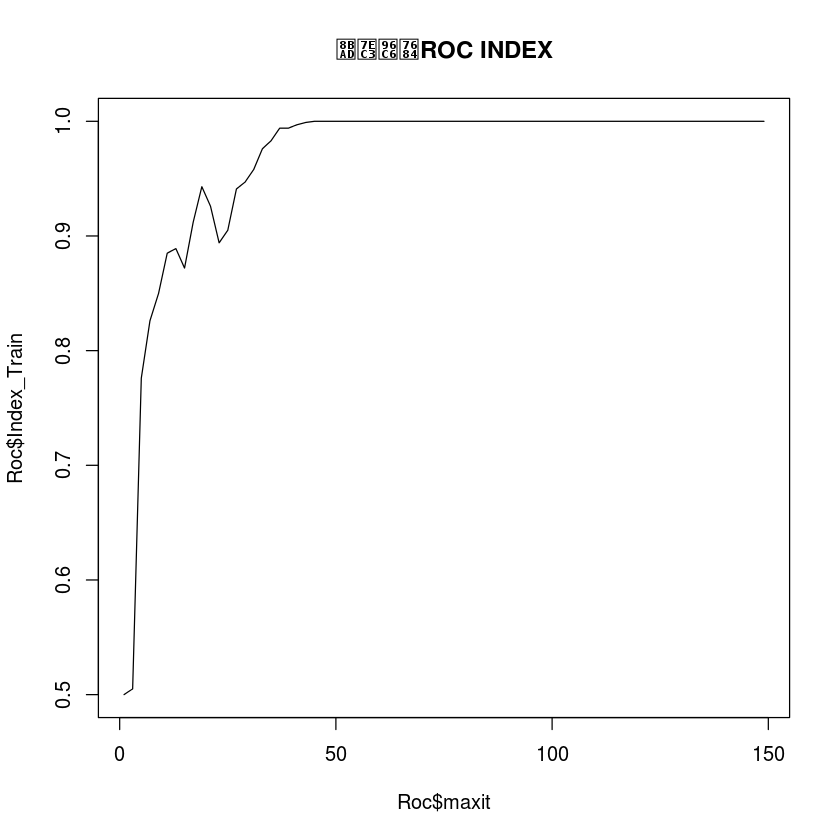

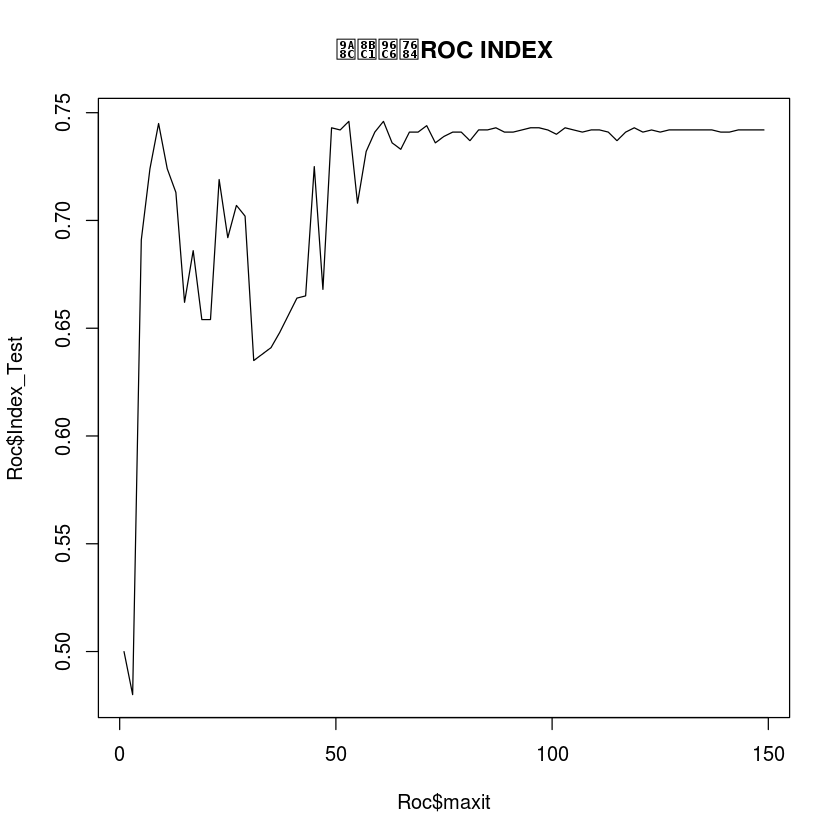

In [52]:
plot(Roc$maxit,Roc$Index_Train,type="l",main="训练集的ROC INDEX")
plot(Roc$maxit,Roc$Index_Test,type="l",main="验证集的ROC INDEX")